In [1]:
push!(LOAD_PATH,"../src/")
using UniversalDiffEq

┌ Warning: Error requiring `Enzyme` from `LinearSolve`
│   exception = (LoadError("/Users/johnbuckner/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveEnzymeExt.jl", 1, ArgumentError("Package LinearSolve does not have Enzyme in its dependencies:\n- If you have LinearSolve checked out for development and have\n  added Enzyme as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000011541c299, Ptr{Nothing} @0x0000000110008f50, Ptr{Nothing} @0x000000011003cbac, Ptr{Nothing} @0x000000011003b94f, Ptr{Nothing} @0x000000011003c165, Ptr{Nothing} @0x000000011003bd72, Ptr{Nothing} @0x000000011003d045, Ptr{Nothing} @0x000000011c0dcd9a, Ptr{Nothing} @0x0000000110008f50, Ptr{Nothing} @0x000000011c19e8b5, Ptr{Nothing} @0x000000011bd0cbb5, Ptr{Nothing} @0x0000000110008f50, Ptr{Nothing} @0x0000000110015d3a, Ptr{Nothing} @0x00000002

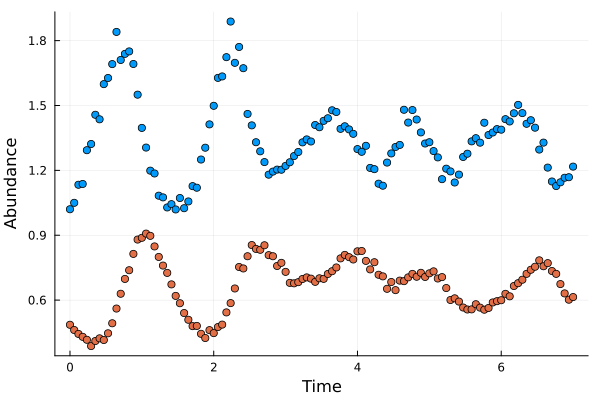

In [2]:
data,X,plt = UniversalDiffEq.LorenzLokaVolterra(T = 7.0, datasize = 120)
plt

In [3]:
Ntest = 20
training_data = data[1:(end-20),:]
testing_data = data[(end-20):end,:]
training_data[1:4,:]


Row,t,x1,x2
,Float64,Float32,Float32
1,0.0,1.02021,0.485974
2,0.0588235,1.04996,0.461757
3,0.117647,1.13349,0.443685
4,0.176471,1.13714,0.430231


In [4]:
model = NODE(training_data,X;proc_weight=2.0,obs_weight=0.5,reg_weight = 10^-4)
nothing

In [5]:
gradient_decent!(model,verbos = true)

1.162 1.053 0.958 0.872 0.791 0.714 0.642 0.576 0.514 0.458 0.407 0.361 0.319 0.282 0.248 0.217 0.19 0.166 0.145 0.126 0.109 0.095 0.082 0.071 0.061 0.052 0.044 0.038 0.033 0.028 0.024 0.02 0.018 0.015 0.014 0.012 0.011 0.01 0.01 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.008 0.008 0.008 0.007 0.007 0.007 0.006 0.006 0.006 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

In [168]:
BFGS!(model)

In [ ]:
plot_state_estiamtes(model)

In [ ]:
plot_predictions(model)

In [ ]:
plt,(p1,p2) = plot_forecast(model, testing_data )
plt

In [ ]:
plot_predictions(model, testing_data)